In [37]:
import torch
import numpy as np
import torch.nn as nn #relacion lineal 
import torch.optim as optim

import matplotlib.pyplot as plt

# Regresion Lineal

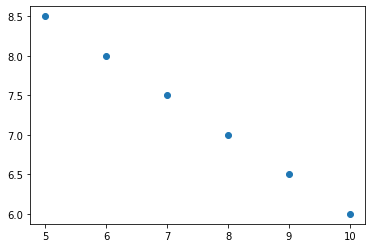

In [38]:
# Unidades vendidas e autos explicadas por los precios
car_prices = [5,6,7,8,9,10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)


In [39]:
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)

print(prices_array)

type(prices_array)

[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


numpy.ndarray

In [40]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True) 
# requires_grad_(True) #activa los gradientes en el tensor
units = torch.from_numpy(units_array).float()

prices, units.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.019474683329463005


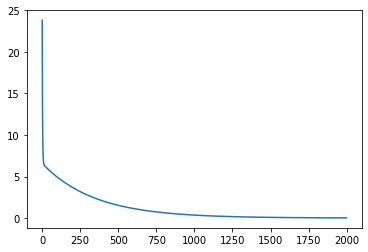

In [41]:
# Declaramos el modelo
model = nn.Linear(1,1)

# Definimos la funcion de perdida
loss_function = nn.MSELoss() 
#MSE media del cuadrado de los errores

# Declaramos el optimizador y learning rate
optimizer = optim.SGD(model.parameters(), lr=0.015) 
#lr = learning rate pasos

losses = []
iterations = 2000

# Escribimos el training loop

for i in range(iterations):
  # Por cada iteracion una prediccion
  #forwardpass
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  #backwardpass
  # reiniciamos los gradientes (pytorch los acumula siempre)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [42]:
# Una vez entrenado el modelo hagamos la prediccion
x = torch.Tensor([[4]])
p = model(x)
print(p)

tensor([[8.6909]], grad_fn=<AddmmBackward>)


# Regresion Logistica

Preparamos nuestros datos

In [72]:
n= 100
h = n//2 # denota la mitad del dataset (50 pares)
dimension = 2

#generamos un dataset aleatorio 
# Por 3 para despues centrarlo en 3,3 y -3,3 
data= np.random.randn(n, dimension) * 3 

#muestro primeros105 valores de la data como ejemplo
data[:10]

array([[ 3.31876244, -1.3586137 ],
       [-0.50701451,  1.61409134],
       [-3.8129561 , -0.72657288],
       [ 6.32030774,  3.2468224 ],
       [ 5.1719483 , -1.68974631],
       [-5.19205413,  0.78850417],
       [-1.83522208, -5.86424048],
       [-3.17859503,  0.9934307 ],
       [-2.79163936, -5.48229759],
       [ 1.04702514,  1.15298732]])

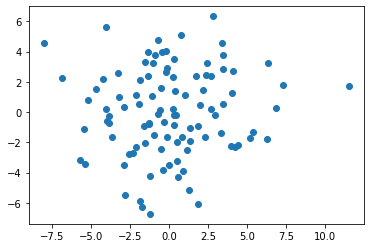

In [73]:
# Graficamos los 100 pares de puntos
plt.scatter(data[:,0], data[:,1])

In [74]:
# Muevo la primer mitad de datos (pares de 1 al 50) centrandolos en -3
data[:h, :] = data[:h, :] - 3 * np.ones((h, dimension))

In [75]:
# Muevo la segunda mitad (pares del 51 al 100) centrandolos en +3
data[h:, :] = data[h:, :] + 3*np.ones((h, dimension))

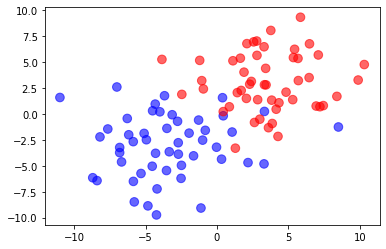

In [76]:
# Graficamos de nuevo
colors = ['blue', 'red']

color = np.array([colors[0]] * h + [colors[1]] * h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [77]:
target = np.array([0] * h + [1] * h).reshape(n,1)

# Definimos el tensor de entrada (la data)
x = torch.from_numpy(data).float().requires_grad_(True)

# definimos el tensor de salida (0 o 1)
y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

Definimos el modelo

tensor(0.1717, grad_fn=<BinaryCrossEntropyBackward>)


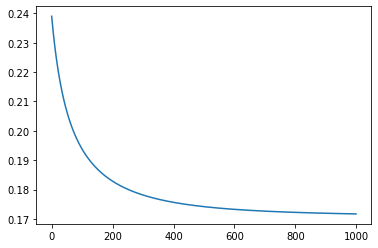

In [78]:
model = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
            )

loss_function = nn.BCELoss() 
#Binary Cross Entropy/log loss

optimizer = optim.SGD(model.parameters(), lr=0.01) 
#Stochastic Gradient Descent

losses = []

iterations = 1000


# definimos el loop de aprendizaje
for i in range(iterations):
  #forwardpass
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)

  #backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Graficamos 
print(loss)
plt.plot(range(iterations), losses)

In [89]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5 
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] >0.5 
print(colors[prediction])

blue
red


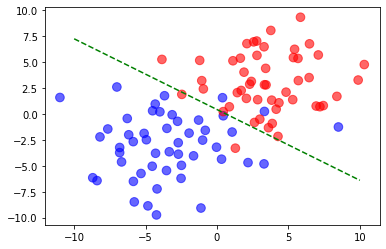

In [100]:
# Graficamos
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

# Hasta aqui es la grafica anterior
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

# graficamos una linea recta
x_axis = np.linspace(-10,10, n) 
y_axis = -(w1[0] + x_axis*w0[0][0] / w0[0][1])
plt.plot(x_axis, y_axis, 'g--')

Extras sobre la grafica


In [103]:
# Valores de X
np.linspace(-10,10, n) 

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [102]:
# Valores de Y
-(w1[0] + x_axis*w0[0][0] / w0[0][1])

array([ 7.25422678,  7.1163386 ,  6.97845041,  6.84056223,  6.70267404,
        6.56478586,  6.42689767,  6.28900949,  6.1511213 ,  6.01323312,
        5.87534493,  5.73745675,  5.59956856,  5.46168038,  5.32379219,
        5.18590401,  5.04801582,  4.91012764,  4.77223945,  4.63435127,
        4.49646308,  4.3585749 ,  4.22068671,  4.08279853,  3.94491034,
        3.80702216,  3.66913398,  3.53124579,  3.39335761,  3.25546942,
        3.11758124,  2.97969305,  2.84180487,  2.70391668,  2.5660285 ,
        2.42814031,  2.29025213,  2.15236394,  2.01447576,  1.87658757,
        1.73869939,  1.6008112 ,  1.46292302,  1.32503483,  1.18714665,
        1.04925846,  0.91137028,  0.77348209,  0.63559391,  0.49770572,
        0.35981754,  0.22192935,  0.08404117, -0.05384702, -0.1917352 ,
       -0.32962339, -0.46751157, -0.60539976, -0.74328794, -0.88117612,
       -1.01906431, -1.15695249, -1.29484068, -1.43272886, -1.57061705,
       -1.70850523, -1.84639342, -1.9842816 , -2.12216979, -2.26